# TPn° 5 : Ensemble learning

In [28]:
from __future__ import division
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

## - Agrégation de modèles -

#### Question 1 :

Xi ~ Ber(p)
S = $\sigma_{i=1}^{L}Xi$ ~Bin(L, p 

Majorité a juste <=> S > $l/2$

P(class ag a juste) = P(S>$L/2$)
$\sigma_{i>L/2}^{L}P(S=i)$

In [21]:
def binom(k,n,p):
    """binom(k,n,p): probabilité d'avoir k réussite(s) dans n évènements indépendants, chaque évènement ayant une probabilité p% de réussite"""
    x = m.comb(n,k)*pow(p,k)*pow(1-p,n-k)
    return x

In [22]:
# Pour L = 1, p=0.7
# Pour L = 5
print(binom(3,5,0.7))
# Pour l = 10
print(binom(5,10,0.7))
# Pour L = 50
print(binom(25,50,0.7))
# Pour L = 100
print(binom(50,100,0.7))

AttributeError: module 'math' has no attribute 'comb'

[ 0  1  2  3  4  5  6  7  8  9 10]


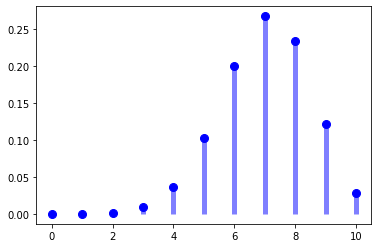

In [9]:
L, p = 10, 0.7
rv = binom(L, p)
k = np.arange(L + 1)
pmf = binom.pmf(k, L, p)
fig, ax = plt.subplots(1,1)
ax.plot(k, pmf, 'bo', ms = 8, label = 'binom pmf')
ax.vlines(k, 0, pmf, color = 'b', lw = 5 , alpha = 0.5)
plt.show()

## 1 Bagging

#### Question 2 :

On tire N données parmis N donnée avec remise. On tirera alors des données avec la meme loi que celle des données.

Bagging : on construit à partir de L echantillons L classifieur. 

On peut regler le max_feature (nombre de dimension) et le max_sample la quatité de donnée qu'on prend en comparaison du vrai data set (sous echantillonage avec remise)

In [26]:
# Create a random dataset
rng = np.random.RandomState(1)

X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 1 *(0.5 - rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


In [31]:
tree = DecisionTreeRegressor(max_depth=1)
fit_tree = tree.fit(X, y)
predict_tree = tree.predict(X_test)

In [32]:
n_estimators = 100
bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=1), bootstrap_features=True)
fit_bagging = bagging.fit(X, y)
predict_bagging = bagging.predict(X_test)

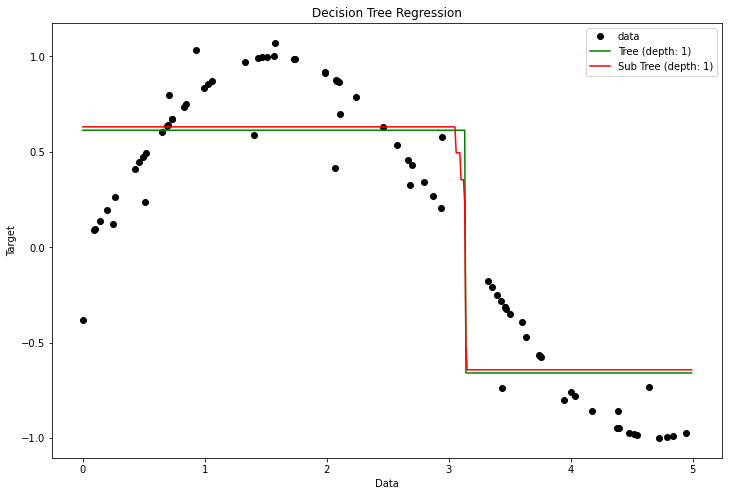

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, predict_tree, c="g", label="Tree (depth: %d)" % 1)
plt.plot(X_test, predict_bagging, c="r",
         label="Sub Tree (depth: %d)" % 1)
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

In [34]:
tree = DecisionTreeRegressor(max_depth=5)
fit_tree = tree.fit(X, y)
predict_tree = tree.predict(X_test)

In [35]:
n_estimators = 100
bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=5), bootstrap_features=True)
fit_bagging = bagging.fit(X, y)
predict_bagging = bagging.predict(X_test)

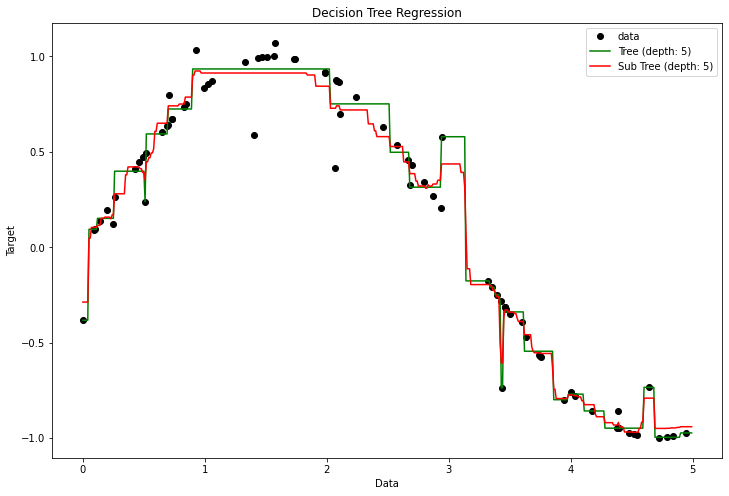

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, predict_tree, c="g", label="Tree (depth: %d)" % 5)
plt.plot(X_test, predict_bagging, c="r",
         label="Sub Tree (depth: %d)" % 5)
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

## 2 Random Forest

## 3 Boosting